In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import  classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df = pd.DataFrame(df)

In [4]:
df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [7]:
num_data = ['trestbps','age','thalach','oldpeak','chol']

trestbps


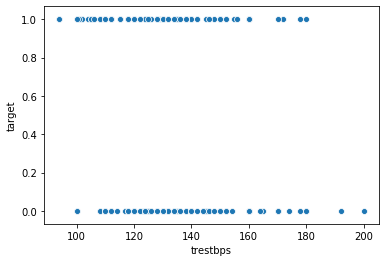

--------------------------------
age


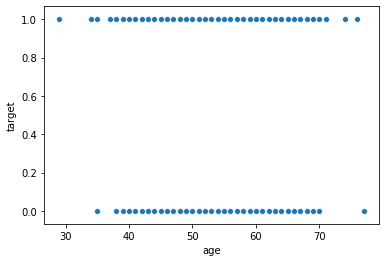

--------------------------------
thalach


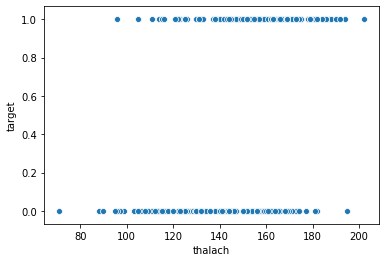

--------------------------------
oldpeak


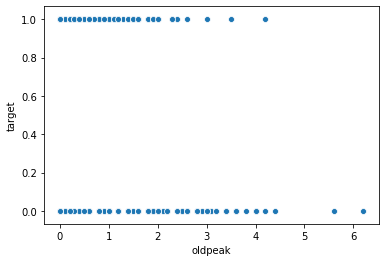

--------------------------------
chol


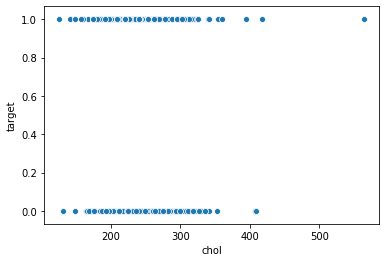

--------------------------------


In [8]:
for col in num_data:
    
    try:
        print(col)
        plt.figure()
        sns.scatterplot(data=df,y='target',x=col)
        plt.show()
    except:
        pass
    print('--------------------------------')

In [9]:
cat_data = ['sex','cp','fbs','exang','restecg','slope','ca','thal']

sex


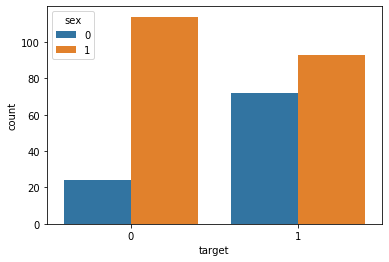

--------------------------------
cp


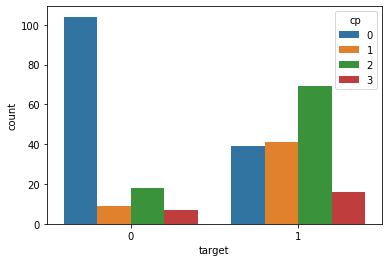

--------------------------------
fbs


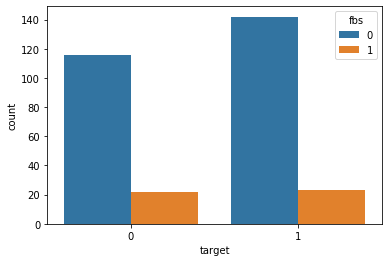

--------------------------------
exang


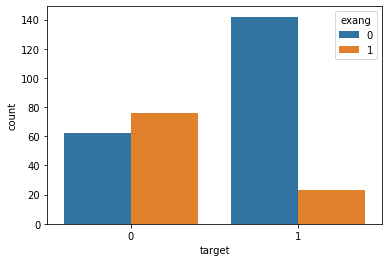

--------------------------------
restecg


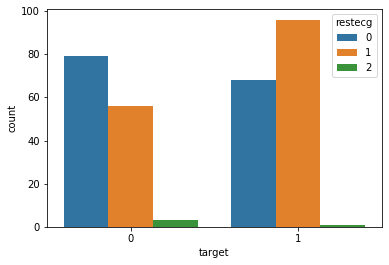

--------------------------------
slope


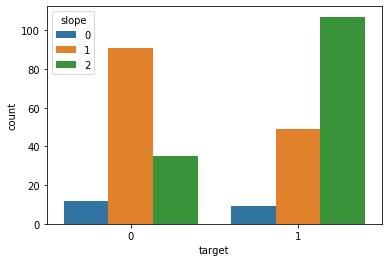

--------------------------------
ca


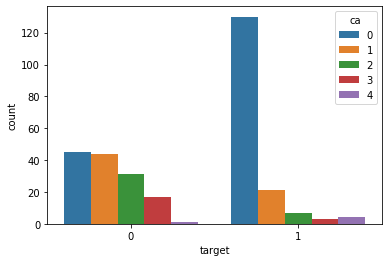

--------------------------------
thal


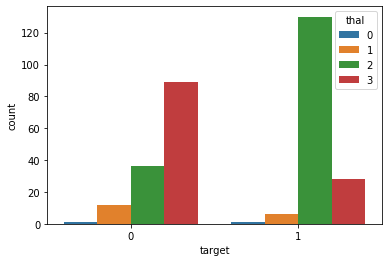

--------------------------------


In [10]:
for col in cat_data:
    
    try:
        print(col)
        plt.figure()
        sns.countplot(data=df,x='target',hue=col)
        plt.show()
    except:
        pass
    print('--------------------------------')

trestbps


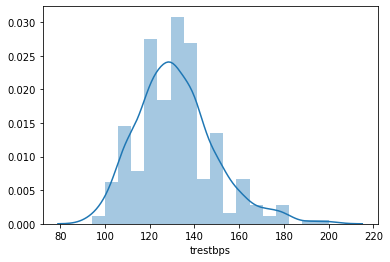

--------------------------------
age


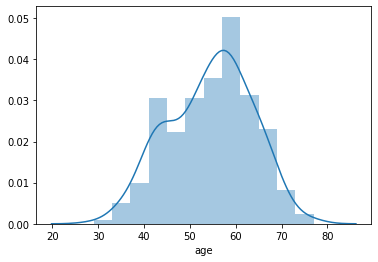

--------------------------------
thalach


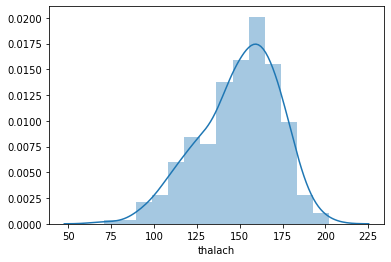

--------------------------------
oldpeak


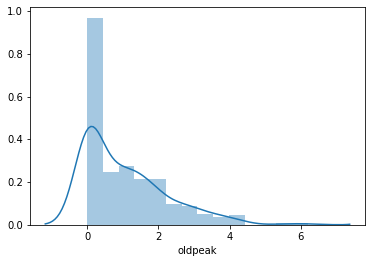

--------------------------------
chol


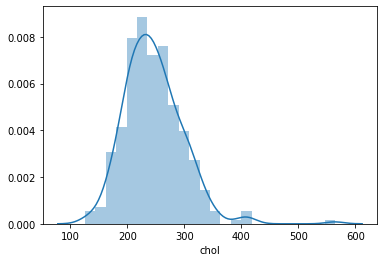

--------------------------------


In [11]:
for col in num_data:
    
    try:
        print(col)
        plt.figure()
        sns.distplot(df[col])
        plt.show()
    except:
        pass
    print('--------------------------------')

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
corr  = df.corr()

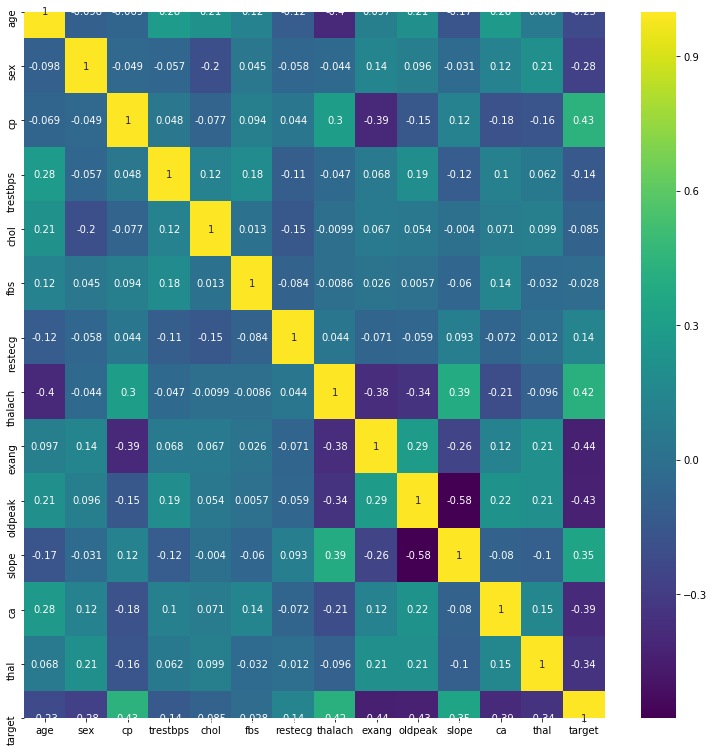

In [32]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True,cmap="viridis")
plt.show()

In [15]:
X = df.iloc[:,:-1]   # all column and  minus last column
y = df.iloc[:,-1]    #add all rows and last column

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [18]:
lr =LogisticRegression(random_state=1)


In [19]:
classify(lr)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
dt = DecisionTreeClassifier()

In [21]:
dt = classify(dt)

              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.77      0.72      0.74        50

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [22]:
dt.feature_importances_

array([0.10820677, 0.01713481, 0.31774899, 0.06876177, 0.07749651,
       0.        , 0.        , 0.0457325 , 0.10469932, 0.09536573,
       0.        , 0.13041731, 0.03443628])

In [23]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [24]:
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,y_train)
    X_test_new = test.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(test.get_support())
    return model

In [25]:
feature_test(f_regression,3,lr)

              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.70      0.76      0.73        50

    accuracy                           0.69        91
   macro avg       0.69      0.68      0.69        91
weighted avg       0.69      0.69      0.69        91

[False False  True False False False False  True  True False False False
 False]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
feature_test(f_regression,5,lr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.80      0.78      0.79        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[False False  True False False False False  True  True  True False  True
 False]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
feature_test(f_regression,8,lr)    #  we get better score here when k=8

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
feature_test(chi2,8,lr)      #It gives less scores

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

[ True False  True  True  True False False  True  True  True False  True
 False]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
feature_test(f_regression,8,dt)

              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.77      0.72      0.74        50

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91

[False  True  True False False False False  True  True  True  True  True
  True]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
feature_test(f_regression,8,dt)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.77      0.74      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[False  True  True False False False False  True  True  True  True  True
  True]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
from sklearn.svm import LinearSVC

In [38]:
lsv = LinearSVC(random_state=1)

In [42]:
feature_test(f_regression,8,lsv)

              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.75      0.92      0.83        50

    accuracy                           0.79        91
   macro avg       0.81      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91

[False  True  True False False False False  True  True  True  True  True
  True]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [40]:
feature_test(chi2,8,lsv)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.77      0.80      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91

[ True False  True  True  True False False  True  True  True False  True
 False]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)